<a href="https://colab.research.google.com/github/busranur-sr/ClimateChange/blob/main/Co2Emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
df = pd.read_csv('out.csv')

df['Date']=df['Date'].str.split(expand=True)[0] # Date verisi object halindeydi. İçinde veri "1990 [YR1990]" bu şekilde bulunuyordu. İlk kısım çekildi.	
df=df.replace('..', np.nan) # Boş veriler .. şeklinde gösteriliyordu. Nan haline getirildi.
df=df.rename(columns={"CO2 emissions from liquid fuel consumption (kt)": "Liquid Co",  # Column isimlerinin düzenlenmesi
                      "CO2 emissions from gaseous fuel consumption (kt)" :"Gaseous Co",
                      "CO2 emissions from solid fuel consumption (kt)" : "Solid Co",
                      "Total greenhouse gas emissions (kt of CO2 equivalent)":"Total Co"})
df=df.astype({'Liquid Co':'float64','Gaseous Co':'float64','Solid Co':'float64','Date':'int16'
,'Total Co':'float64'}) # data type object-> float. Üzerinde işlem yapabilmek için 
df=df[df['Date']<2016] # Rest of years's data is empty

In [2]:
df.head(5)

,Country Name,Date,Access to electricity (% of population),Agricultural irrigated land (% of total agricultural land),Agricultural land (% of land area),Agricultural land (sq. km),"Agriculture, forestry, and fishing, value added (% of GDP)","Annual freshwater withdrawals, total (% of internal resources)","Annual freshwater withdrawals, total (billion cubic meters)",Arable land (% of land area),Average precipitation in depth (mm per year),CO2 emissions (kg per 2015 US$ of GDP),CO2 emissions (kg per 2017 PPP $ of GDP),CO2 emissions (kg per PPP $ of GDP),CO2 emissions (kt),CO2 emissions (metric tons per capita),CO2 emissions from gaseous fuel consumption (% of total),Gaseous Co,CO2 emissions from liquid fuel consumption (% of total),Liquid Co,CO2 emissions from solid fuel consumption (% of total),Solid Co,CO2 intensity (kg per kg of oil equivalent energy use),CPIA public sector management and institutions cluster average (1=low to 6=high),Cereal yield (kg per hectare),"Community health workers (per 1,000 people)",Disaster risk reduction progress score (1-5 scale; 5=best),"Droughts, floods, extreme temperatures (% of population, average 1990-2009)",Ease of doing business rank (1=most business-friendly regulations),Electric power consumption (kWh per capita),Electricity production from coal sources (% of total),Electricity production from hydroelectric sources (% of total),Electricity production from natural gas sources (% of total),Electricity production from nuclear sources (% of total),Electricity production from oil sources (% of total),"Electricity production from renewable sources, excluding hydroelectric (% of total)","Electricity production from renewable sources, excluding hydroelectric (kWh)",Energy use (kg of oil equivalent per capita),"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)","Foreign direct investment, net inflows (% of GDP)",Forest area (% of land area),Forest area (sq. km),GHG net emissions/removals by LUCF (Mt of CO2 equivalent),HFC gas emissions (thousand metric tons of CO2 equivalent),Land area where elevation is below 5 meters (% of total land area),Marine protected areas (% of territorial waters),Methane emissions (% change from 1990),Methane emissions (kt of CO2 equivalent),"Mortality rate, under-5 (per 1,000 live births)",Nitrous oxide emissions (% change from 1990),Nitrous oxide emissions (thousand metric tons of CO2 equivalent),Other greenhouse gas emissions (% change from 1990),"Other greenhouse gas emissions, HFC, PFC and SF6 (thousand metric tons of CO2 equivalent)",PFC gas emissions (thousand metric tons of CO2 equivalent),Population growth (annual %),Population in urban agglomerations of more than 1 million (% of total population),Population living in areas where elevation is below 5 meters (% of total population),"Population, total",Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population),"Prevalence of underweight, weight for age (% of children under 5)","Primary completion rate, total (% of relevant age group)",Renewable electricity output (% of total electricity output),Renewable energy consumption (% of total final energy consumption),Rural land area where elevation is below 5 meters (% of total land area),Rural land area where elevation is below 5 meters (sq. km),Rural population living in areas where elevation is below 5 meters (% of total population),SF6 gas emissions (thousand metric tons of CO2 equivalent),"School enrollment, primary and secondary (gross), gender parity index (GPI)",Terrestrial and marine protected areas (% of total territorial area),Terrestrial protected areas (% of total land area),Total greenhouse gas emissions (% change from 1990),Total Co,Urban land area where elevation is below 5 meters (% of total land area),Urban land area where elevation is below 5 meters (sq. km),Urban population,Urban population (% of total population),Urban population growth (annual %),Urban population living in areas where elevation is below 5 meters (% of t

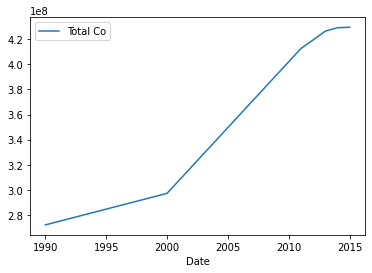

In [3]:
df_ToCo = df[['Date','Total Co','Country Name']]
df_ToCo.groupby('Date').sum().plot()


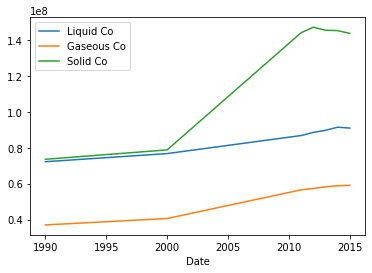

In [4]:
df_Co = df[['Date','Country Name','Liquid Co','Gaseous Co','Solid Co']]
df_Co.groupby(df_Co['Date']).sum().plot() # Toplam yayılım mı mantıklı yoksa ortalama mı
#Because of the dataset, after 2017 all values Nan. So We plot before this year. 

### Amounts of Carbon dioxide emissions from solid, liquid and gaseous fuels in Turkey 

,Country Name,Liquid Co,Gaseous Co,Solid Co
Date,,,,
1990,Turkey,61334.242,6538.261,65873.988
2000,Turkey,81876.776,28943.631,87215.928
2011,Turkey,74524.441,84256.659,130717.549
2012,Turkey,76948.328,85342.091,133288.116
2013,Turkey,77465.375,86013.152,126364.820
2014,Turkey,79434.554,92082.037,138861.956
2015,Turkey,91535.654,90200.866,132983.755


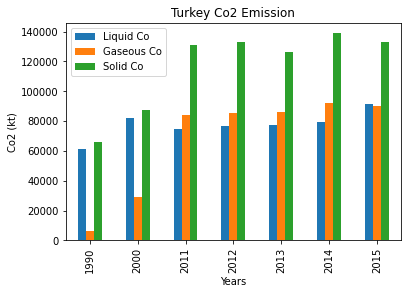

In [5]:
df_Turkey = df_Co.loc[(df_Co['Country Name'] =='Turkey')]
df_Turkey=df_Turkey.set_index('Date')
df_Turkey.plot(kind="bar")
plt.title("Turkey Co2 Emission")
plt.ylabel("Co2 (kt)")
plt.xlabel("Years")
df_Turkey

In [6]:
df_TotalCo_Turkey=pd.read_excel('Turkey_CO2.xls')
df_TotalCo_Turkey=df_TotalCo_Turkey.transpose()
df_TotalCo_Turkey=df_TotalCo_Turkey.reset_index()
df_TotalCo_Turkey

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,"CO2 emisyonları, 1990 - 2019","CO2 emissions, 1990 - 2019",NaN,Sera gazı kaynakları \nGreenhouse gas sources,Toplam \nTotal,Enerji\nEnergy,Yakıt yanması\nFuel combustion,Çevrim ve enerji sektörü\nEnergy industries,İmalat sanayi ve inşaat\nManufacturing industr...,Ulaştırma\nTransport,Diğer sektörler\nOther sectors,Kaçak emisyonlar\nFugitive emissions from fuels,Karbondioksit taşıma ve depolama \nCarbon diox...,Endüstriyel işlemler ve ürün kullanımı\nIndust...,Mineral ürünleri\nMineral products,Kimya sanayi\nChemical industry,Metal üretimi\nMetal production,Enerji dışı yakıt ve solvent kullanımı\nNon-en...,Tarım\nAgriculture,Üre uygulaması\nUrea application,Atık\nWaste,Atıkların açıkta yakılması\nOpen burning of waste,NaN,"TÜİK, Sera Gazı Emisyon İstatistikleri, 1990 -...","TurkStat, Greenhouse Gas Emissions Statistics,...","Tablodaki rakamlar, yuvarlamadan dolayı toplam...",Figures in table may not add up to totals due ...,Tablodaki 1990-2018 verileri revize edilmiştir.,Data in table were revised for the period of 1...,Ormancılık ve diğer arazi kullanımından kaynak...,The emissions and removals from forestry and o...
1,Unnamed: 1,NaN,NaN,1990,151508,129882,129662,37130.3,37004,26250.8,29276.9,220.204,0.126,21139.6,13423.7,565.24,6967.34,183.366,459.946,459.946,26.5923,26.5923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unnamed: 2,NaN,NaN,1995,180903,156827,156618,50297.9,39842.8,33180,33297.2,209.114,0.126,23624.1,17549.4,472.113,5399.71,202.822,425.923,425.923,25.9632,25.9632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unnamed: 3,NaN,NaN,2000,229791,204511,204343,77502.7,57657.3,35490.2,33692.7,167.848,0.126,24641.2,18417.6,214.272,5732.24,277.112,617.474,617.474,20.9753,20.9753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unnamed: 4,NaN,NaN,2005,264201,232409,232267,89665.8,62731.1,41043.8,38826.2,141.602,0.126,31167.1,23246.4,591.285,6883.74,445.738,613.163,613.163,11.8721,11.8721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Unnamed: 5,NaN,NaN,2010,314380,270820,270663,112091,52119.6,44382.6,62069.8,156.157,0.126,42904.1,33393.8,249.559,8829.16,431.587,644.984,644.984,11.21,11.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Unnamed: 6,NaN,NaN,2011,339482,291845,291695,123669,52379.7,46366.8,69279.4,150.521,0.126,47065.4,35297.6,1011.98,9902.12,853.741,557.55,557.55,14.0933,14.0933,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Unnamed: 7,NaN,NaN,2012,353666,304432,304288,124753,60821.1,61248.5,57465.5,143.695,0.126,48580.3,36384.4,1191.96,10398.4,605.519,639.769,639.769,14.4163,14.4163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Unnamed: 8,NaN,NaN,2013,345221,292914,292768,119519,52772,67478.1,52998.7,145.537,0.126,51492.3,39618.1,792.805,10547.9,533.588,807.301,807.301,7.37239,7.37239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Unnamed: 9,NaN,NaN,2014,361675,309259,309113,130128,54232.9,72084.3,52668.2,145.487,0.126,51628.3,39854.6,976.189,10398.3,399.159,787.69,787.69,0.477287,0.477287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data = zip(df_TotalCo_Turkey[2][1:].tolist(),df_TotalCo_Turkey[5][1:].tolist())
df2 = pd.DataFrame(data, columns = ['Date', 'Fuel combustion'])
df2=df2.astype({'Date':'int16','Fuel combustion':'float64'})
df3=pd.merge(df_Co[df_Co['Country Name']=='Turkey'],df_ToCo[df_ToCo['Country Name']=='Turkey'])
df_Turkey=pd.merge(df3[df3['Country Name']=='Turkey'],df2,on='Date',how='right')
df_Turkey

,Date,Country Name,Liquid Co,Gaseous Co,Solid Co,Total Co,Fuel combustion
0,1990,Turkey,61334.242,6538.261,65873.988,206210.0,129661.990751
1,1995,NaN,NaN,NaN,NaN,NaN,156617.834697
2,2000,Turkey,81876.776,28943.631,87215.928,284420.0,204342.982663
3,2005,NaN,NaN,NaN,NaN,NaN,232266.890943
4,2010,NaN,NaN,NaN,NaN,NaN,270663.498970
5,2011,Turkey,74524.441,84256.659,130717.549,396910.0,291694.543162
6,2012,Turkey,76948.328,85342.091,133288.116,411020.0,304287.890826
7,2013,Turkey,77465.375,86013.152,126364.820,402240.0,292767.905965
8,2014,Turkey,79434.554,92082.037,138861.956,427120.0,309113.418599
9,2015,Turkey,91535.654,90200.866,132983.755,433850.0,329627.199092


Text(0.5, 0, 'Years')

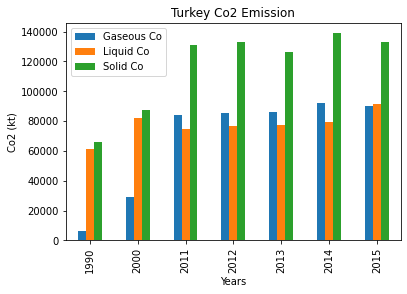

In [19]:
#df_Turkey=df_Turkey.set_index('Date')
df_Turkey[['Gaseous Co','Liquid Co','Solid Co']].dropna(how='all').plot(kind='bar')
plt.title("Turkey Co2 Emission")
plt.ylabel("Co2 (kt)")
plt.xlabel("Years")


Text(0.5, 0, 'Years')

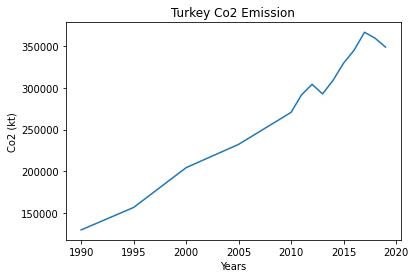

In [24]:
df_Turkey['Fuel combustion'].plot()
plt.title("Turkey Co2 Emission")
plt.ylabel("Co2 (kt)")
plt.xlabel("Years")